# Exercise sheet 1

Group members:
* David Munkacsi
* Max-Jonathan Luckow
* Fabian Frank
* Philipp Leon Jung
* Jan Botsch

## 1.1 Scatter and Line Plots
### (a) Importing libraries reading the data

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reading the expDat.txt file using pandas.
data = pd.read_csv("expDat.txt", sep=",", index_col=0)

### (b) Creating the line plot

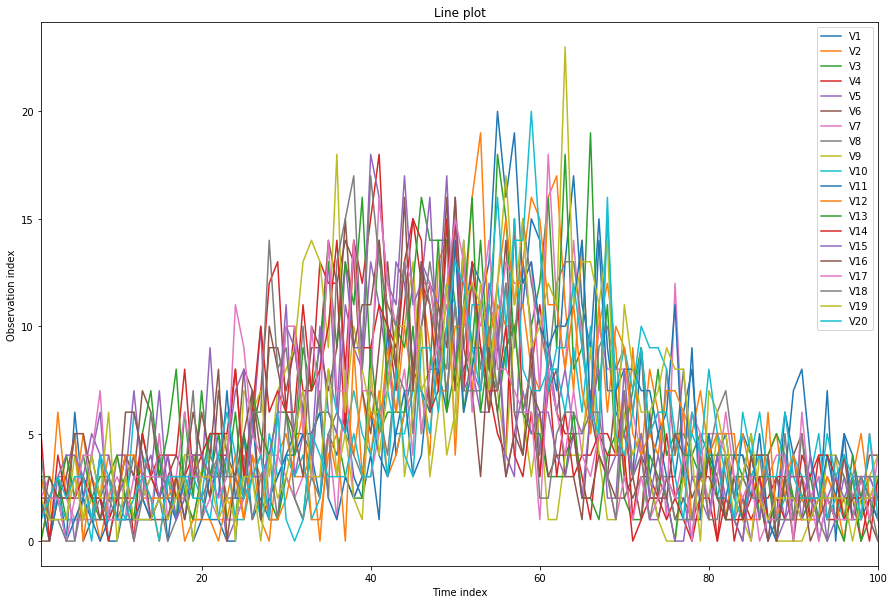

In [62]:
# Creating the line plot with the built-in DataFrame.plot function.
data.plot(figsize=(15,10))
plt.title("Line plot")
plt.xlabel("Time index")
plt.ylabel("Observation index")
plt.show()

### (c) Creating the scatter plot matrix

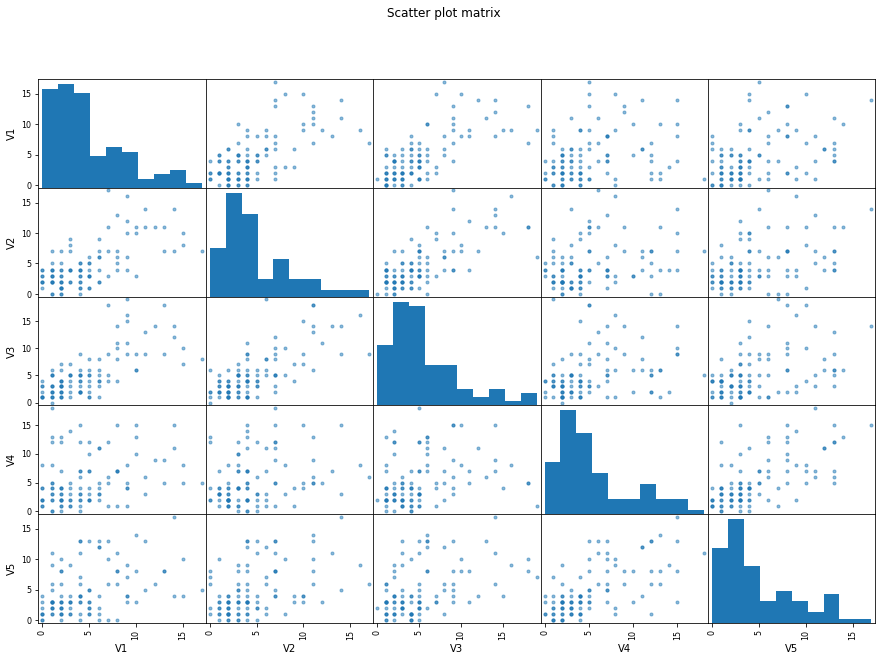

In [63]:
from pandas.tools.plotting import scatter_matrix

# Creating the scatter plot matrix from the first 5 observations.
scatter_matrix(data.ix[:, 0:5], alpha=0.5,figsize=(15,10))
plt.suptitle("Scatter plot matrix")
plt.show()


### (d) Computing of the covariance matrix and creating a heatplot

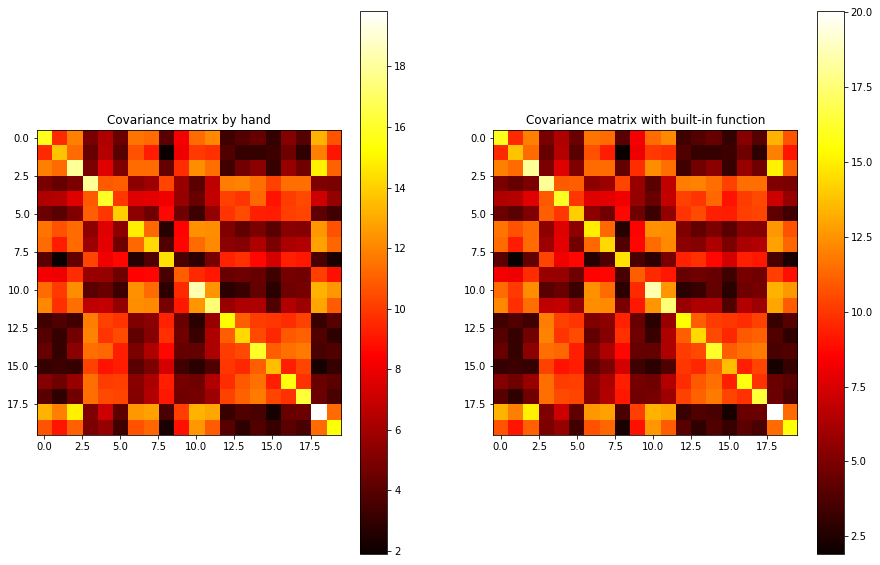

In [64]:
# Computing the mean vector.
meanVector = np.mean(data.values, 0)

# Centering the data.
centeredData = data.values - meanVector
length = centeredData.shape[0]

# Computing the covariance matrix by hand (using matrix multiplication).
covarianceMatrix = np.dot(centeredData.T, centeredData) / length
#print(covarianceMatrix)

# Computing the covariance matrix with the built-in cov() function.
covarianceMatrixBuiltIn = np.cov(centeredData.T)
#print(covarianceMatrixBuiltIn)

# Plotting the results on a heatplot.
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(covarianceMatrix, cmap='hot')
plt.colorbar()
plt.title("Covariance matrix by hand")

plt.subplot(122)
plt.imshow(covarianceMatrixBuiltIn, cmap='hot')
plt.colorbar()
plt.title("Covariance matrix with built-in function")

plt.show()

## 1.2 Plotting 3d
### (a) Reading the data

In [65]:
pcaData = pd.read_csv("pca-data-3d.txt", sep=",")
#print(pcaData)

### (b) Creating the scatter plot matrix

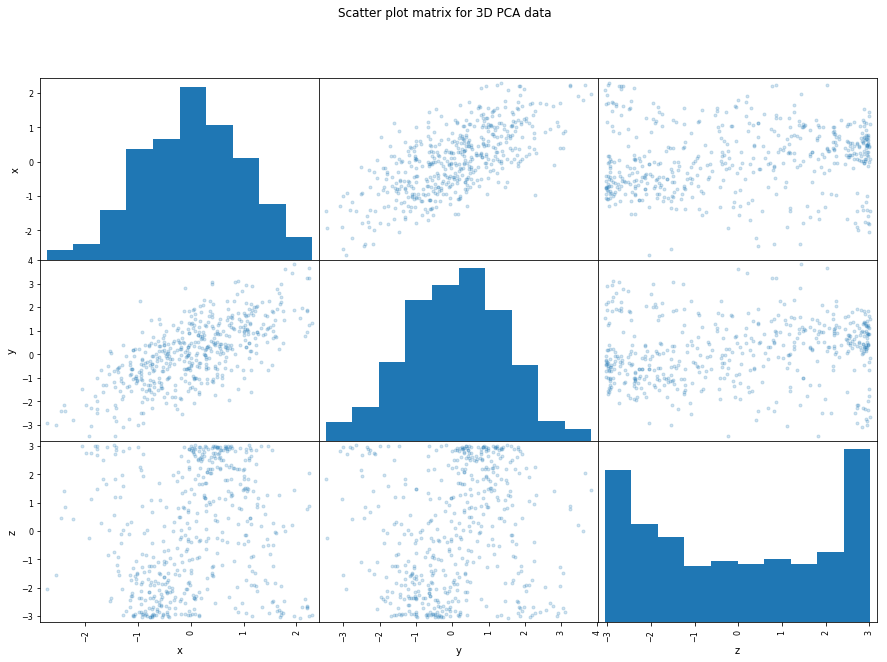

In [66]:
# Same as exercise 1 but without any projection of the data.
scatter_matrix(pcaData, alpha=0.2, figsize=(15,10))
plt.suptitle("Scatter plot matrix for 3D PCA data")
plt.show()

### (c) Visualizing the data in 3D

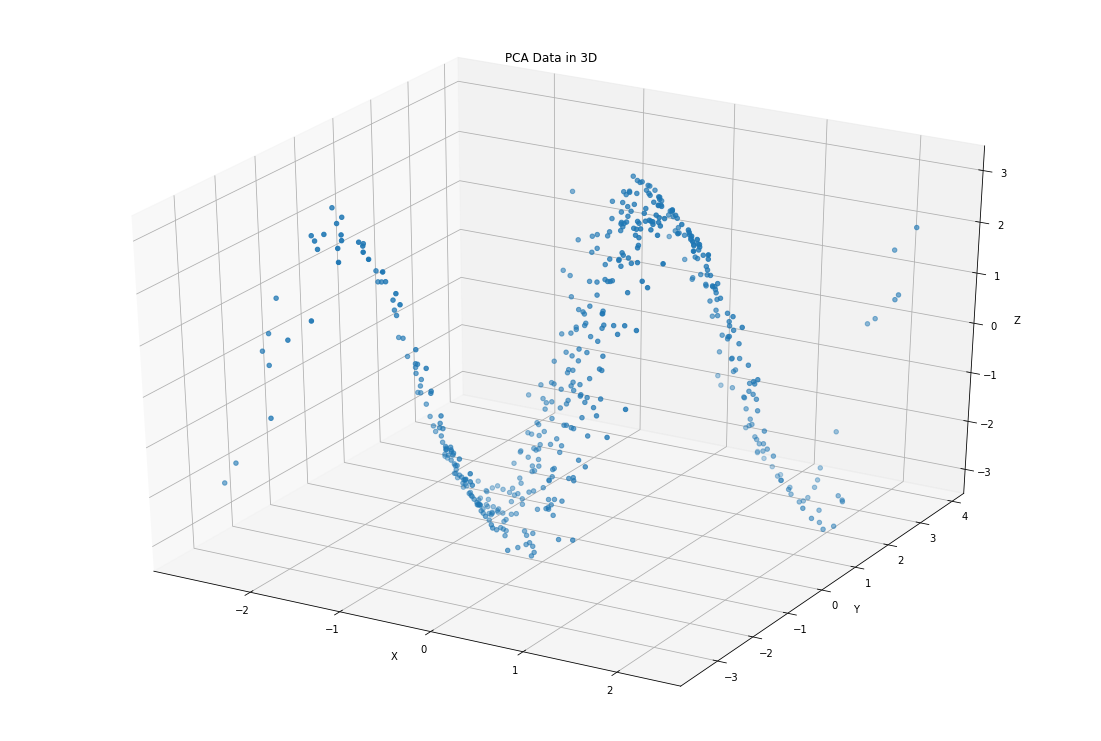

In [67]:
from mpl_toolkits.mplot3d import Axes3D

# Creating a 3D scatter plot
fig = plt.figure(figsize=(15,10));
plot3D = Axes3D(fig)
plot3D.scatter(pcaData["x"], pcaData["y"], pcaData["z"])
plot3D.set_xlabel("X")
plot3D.set_ylabel("Y")
plot3D.set_zlabel("Z")
plot3D.set_title("PCA Data in 3D")
plt.show()

### Interpretation: The given data describes a plane wave in the 3D space.

### (d) Converting the data to 2D, projecting it to unit vector (0, 15 ... 180), variances against angles

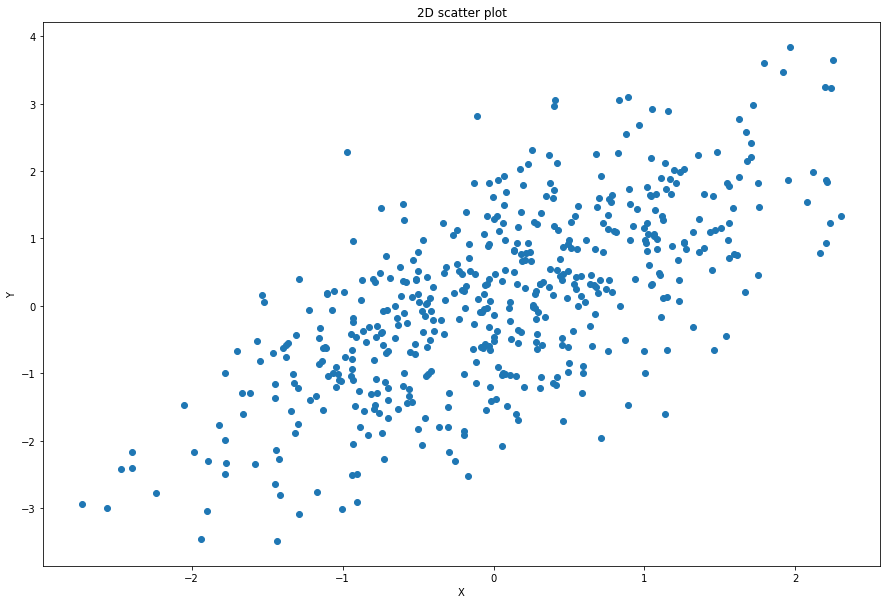

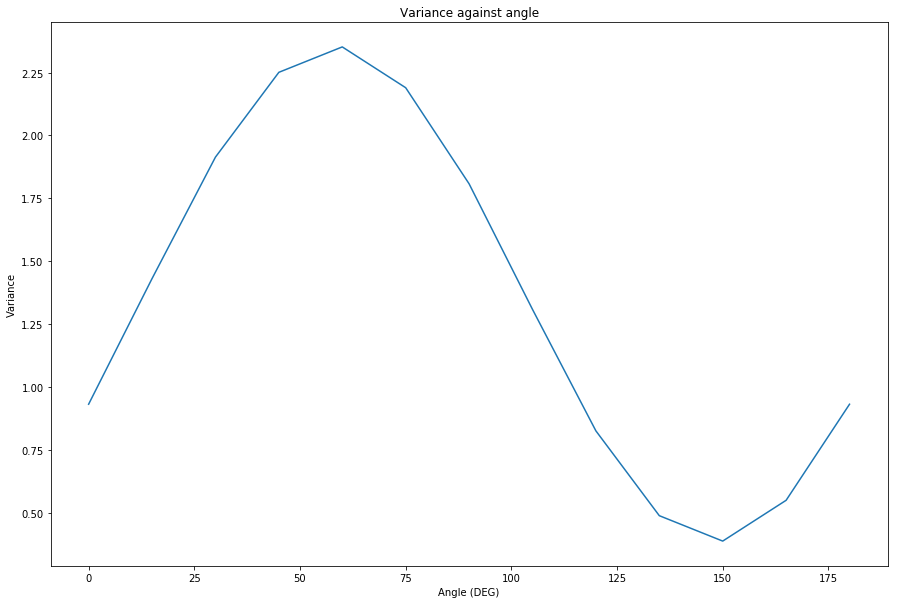

In [68]:
# Selecting the required dimensions.
pcaData2D = pcaData.ix[:, 'x':'y']
#print(pcaData2D)

# Creating the scatter plot.
plt.figure(figsize=(15,10))
plt.scatter(pcaData2D['x'], pcaData2D['y'])
plt.title("2D scatter plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Creating the angles (DEG only for later use). Linear sequence from 0, 15 ... 180 (13 members).
anglesCount = 13
anglesDeg = np.linspace(0, 180, anglesCount)
anglesRad = np.deg2rad(anglesDeg)
#print(angles)

# Creating the vectors.
uv = np.zeros((13,2));
uv[:, 0] = np.cos(anglesRad)
uv[:, 1] = np.sin(anglesRad)

# Number of records.
count = pcaData2D.shape[0]

# Creating projections.
projections = np.zeros((count, anglesCount))
for i in range(0,anglesCount):
    # Multiplying the data with the vectors.
    projections[:,i] = np.dot(pcaData2D, uv[i])

# Calculating variances.
variances = np.var(projections, 0)

# Plotting the results.
plt.figure(figsize=(15,10))
plt.plot(anglesDeg, variances)
plt.title("Variance against angle")
plt.xlabel("Angle (DEG)")
plt.ylabel("Variance")
plt.show()

## 1.3 Data Processing: Image data

### (a) Reading the image data

In [69]:
from PIL import Image
img = Image.open("natIMG.jpg")
#print(img.getim())

### (b) Plotting the image on a heatplot

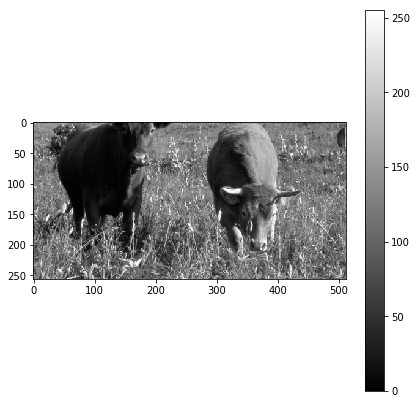

In [70]:
plt.figure(figsize=(7,7))
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

### (c) Sampling image patches

In [71]:
from sklearn.feature_extraction import image

#Extracting 2D patches with the imported library. The loaded image must be converted to an array first!
imgArray = np.array(img)
sampledPatches = image.extract_patches_2d(np.array(imgArray), (10,10), max_patches=100)
#print(samples)

### (d)-(e) Plotting the patches on the same and on the inverted color scheme

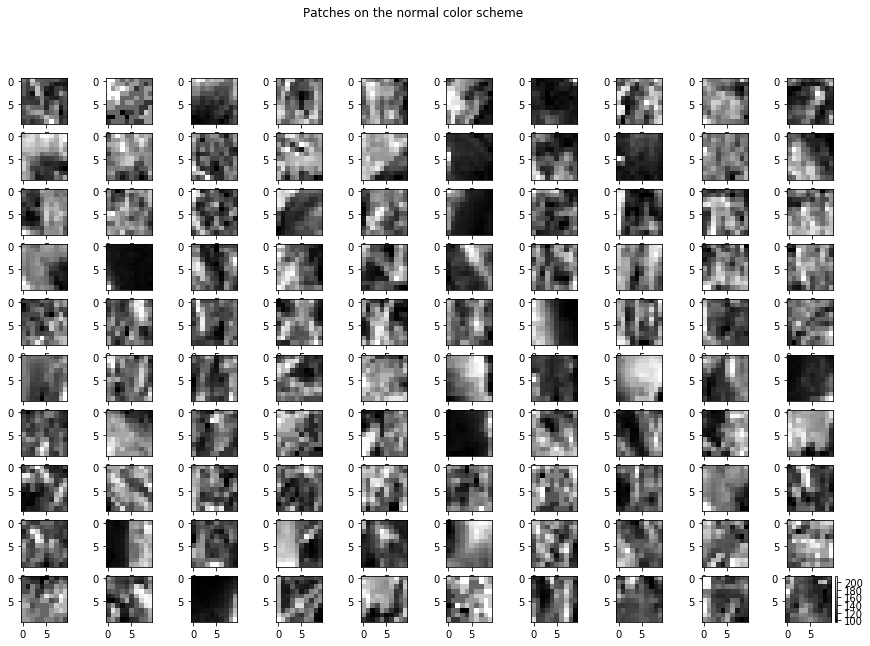

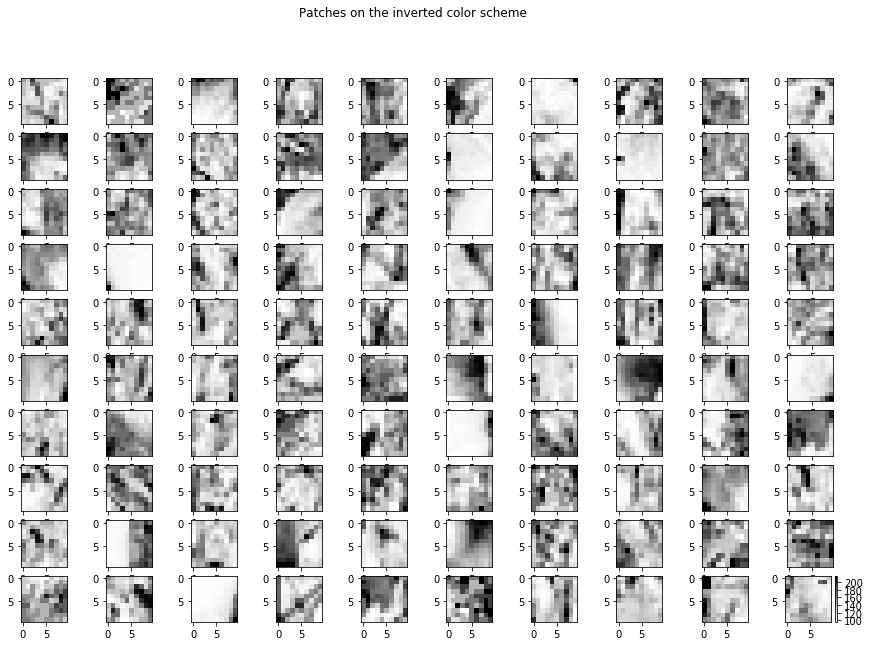

In [72]:
plt.figure(figsize=(15,10))
# Patches on the same color scheme.
# Subplot requires a number larger than 0 mind the indexes!
for i in range(1, 101):
    plt.subplot(10,10,i)
    plt.imshow(sampledPatches[i-1,:,:], cmap="gray")
plt.suptitle("Patches on the normal color scheme")
plt.colorbar()
plt.show()

plt.figure(figsize=(15,10))
# Patches on the inverted color scheme.
for i in range(1, 101):
    plt.subplot(10,10,i)
    plt.imshow(sampledPatches[i-1,:,:], cmap="Greys")
plt.suptitle("Patches on the inverted color scheme")
plt.colorbar()
plt.show()